In [2]:
#working on google colab's GPU and hence mounting the folder on google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls "/content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/"

Test  Train


In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from glob import glob

In [70]:
# Load train and test data
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [6]:
# Get train and test data size
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [7]:
# Set paramaters
batch_size = 32
img_height = 180
img_width = 180

In [8]:
image_size = (img_width, img_height)

In [9]:
# Create train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List class names
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)
print(num_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


In [12]:
# Checking image size and batch size
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


actinic keratosis
basal cell carcinoma
dermatofibroma
melanoma
nevus
pigmented benign keratosis
squamous cell carcinoma
vascular lesion


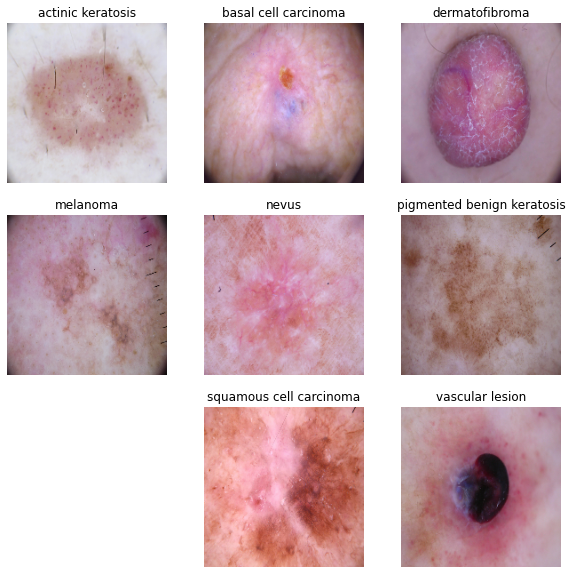

In [13]:
# Plot one image from each class from train dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        print(class_names[label.numpy()[0]])
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
# Build model
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
# Compile model by selecting optimizer, loss function and metrics to compute
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [18]:
# Fit the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 172s 3s/step - loss: 2.4483 - accuracy: 0.2065 - val_loss: 1.9978 - val_accuracy: 0.2461
Epoch 2/20
56/56 [==============================] - 2s 28ms/step - loss: 1.8951 - accuracy: 0.3080 - val_loss: 1.8935 - val_accuracy: 0.3378
Epoch 3/20
56/56 [==============================] - 2s 27ms/step - loss: 1.7264 - accuracy: 0.3666 - val_loss: 1.7906 - val_accuracy: 0.3445
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.5878 - accuracy: 0.4286 - val_loss: 1.5827 - val_accuracy: 0.4541
Epoch 5/20
56/56 [==============================] - 2s 27ms/step - loss: 1.4978 - accuracy: 0.4799 - val_loss: 1.5281 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4128 - accuracy: 0.5106 - val_loss: 1.4820 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3490 - accuracy: 0.5307 - val_loss: 1.4532 - val_accuracy: 0.5034
Epoch 8/20
56

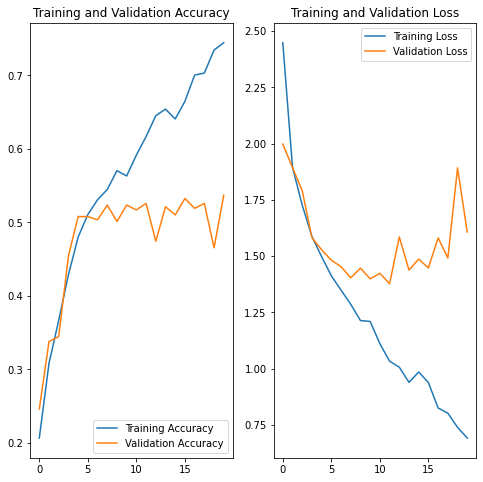

In [20]:
# Visualize the result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


There is significant difference in accuracy between training and validation hinting towards model overfitting.
We will use dropout strategy. 
Other techniques that can be used is data augmentation - Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.



In [21]:
# Build aumentation strategy
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.3)
  ]
)

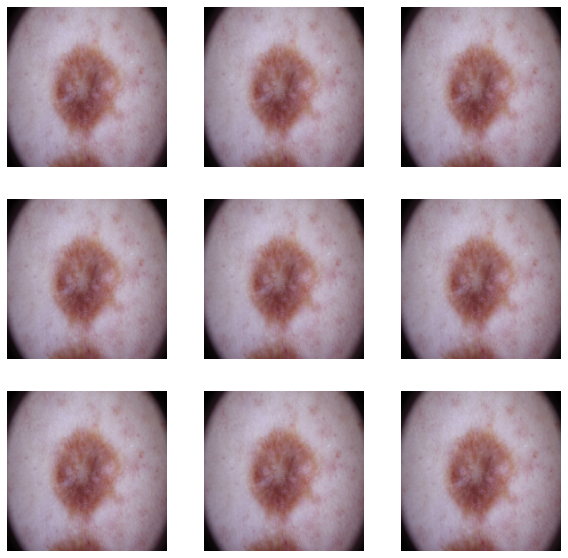

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [23]:
# Build model including augmentation strategy
model_1 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
# Compile the model
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

In [26]:
epochs = 20
history = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 54ms/step - loss: 3.3286 - accuracy: 0.2098 - val_loss: 2.1338 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 3s 52ms/step - loss: 2.0309 - accuracy: 0.2182 - val_loss: 2.1249 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 3s 50ms/step - loss: 2.0057 - accuracy: 0.2461 - val_loss: 2.1038 - val_accuracy: 0.2125
Epoch 4/20
56/56 [==============================] - 3s 50ms/step - loss: 1.8498 - accuracy: 0.3276 - val_loss: 2.0870 - val_accuracy: 0.2282
Epoch 5/20
56/56 [==============================] - 3s 51ms/step - loss: 1.7477 - accuracy: 0.3700 - val_loss: 2.1801 - val_accuracy: 0.1588
Epoch 6/20
56/56 [==============================] - 3s 50ms/step - loss: 1.5857 - accuracy: 0.4537 - val_loss: 2.1092 - val_accuracy: 0.2416
Epoch 7/20
56/56 [==============================] - 3s 50ms/step - loss: 1.5607 - accuracy: 0.4475 - val_loss: 2.0898 - val_accuracy: 0.2528
Epoch 8/20
56

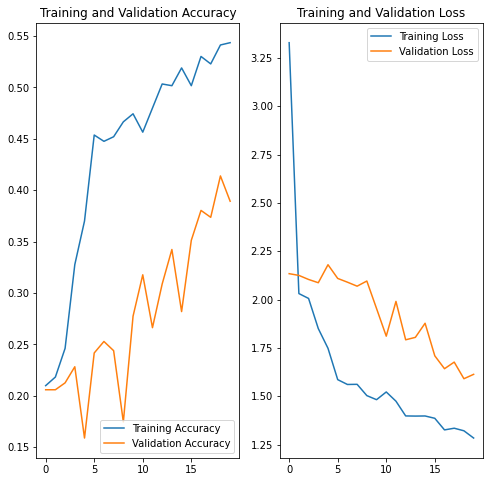

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
# Check distribution of images in train dataset
path_list_train = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_train = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_train = dict(zip(path_list_train, lesion_list_train))
df_train = pd.DataFrame(list(dataframe_dict_train.items()),columns = ['Path','Label'])
df_train['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

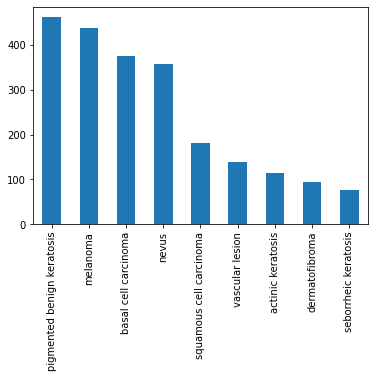

In [29]:
df_train['Label'].value_counts().plot.bar()

In training dataset, 'pigmented benign keratosis' class have maximum number of images = 462, where as 'seborrheic keratosis' have only 77 images
This shows class imbalance.

In [30]:
# Image distribution in training dataset
label_count = {}
for image_batch, labels_batch in train_ds:
  for label in labels_batch:
    if label.numpy() in label_count:
      label_count[label.numpy()] = label_count[label.numpy()] + 1
    else:
      label_count[label.numpy()] = 1
print(label_count)

count = {}
for key, value in label_count.items():
  count[class_names[key]] = value
print(count)

{3: 352, 8: 115, 1: 309, 7: 142, 0: 92, 4: 277, 6: 58, 5: 370, 2: 77}
{'melanoma': 352, 'vascular lesion': 115, 'basal cell carcinoma': 309, 'squamous cell carcinoma': 142, 'actinic keratosis': 92, 'nevus': 277, 'seborrheic keratosis': 58, 'pigmented benign keratosis': 370, 'dermatofibroma': 77}


In [31]:
# Image distribution in validation dataset
label_count = {}
for image_batch, labels_batch in val_ds:
  for label in labels_batch:
    if label.numpy() in label_count:
      label_count[label.numpy()] = label_count[label.numpy()] + 1
    else:
      label_count[label.numpy()] = 1
print(label_count)

count = {}
for key, value in label_count.items():
  count[class_names[key]] = value
print(count)

{8: 24, 4: 80, 2: 18, 1: 67, 7: 39, 5: 92, 3: 86, 6: 19, 0: 22}
{'vascular lesion': 24, 'nevus': 80, 'dermatofibroma': 18, 'basal cell carcinoma': 67, 'squamous cell carcinoma': 39, 'pigmented benign keratosis': 92, 'melanoma': 86, 'seborrheic keratosis': 19, 'actinic keratosis': 22}


In [32]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline('/content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train',save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F52655F5FD0>: 100%|██████████| 500/500 [00:38<00:00, 13.08 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7F51DDE9F990>: 100%|██████████| 500/500 [00:48<00:00, 10.31 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F525065FC10>: 100%|██████████| 500/500 [00:48<00:00, 10.31 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F51DF71E9D0>: 100%|██████████| 500/500 [00:40<00:00, 12.40 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F51E638E8D0>: 100%|██████████| 500/500 [00:42<00:00, 11.68 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F51E65C66D0>: 100%|██████████| 500/500 [00:47<00:00, 10.60 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F526C470E10>: 100%|██████████| 500/500 [00:37<00:00, 13.18 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F51DDE9FC90>: 100%|██████████| 500/500 [00:43<00:00, 11.45 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F51E7F75C50>: 100%|██████████| 500/500 [00:48<00:00, 10.32 Samples/s]


In [103]:
image_count_train_1 = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train_1)

4188


In [104]:
path_list_train_1 = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_train_1)

4188

In [105]:
lesion_list_train_1 = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_train_1)

4188

In [106]:
dataframe_dict_train_1 = dict(zip(path_list_train_1, lesion_list_train_1))

In [107]:
df_train_1 = pd.DataFrame(list(dataframe_dict_train_1.items()),columns = ['Path','Label'])
df_train_1.head()

,Path,Label
0,/content/gdrive/MyDrive/UpGrad/Assignments/Mel...,actinic keratosis
1,/content/gdrive/MyDrive/UpGrad/Assignments/Mel...,actinic keratosis
2,/content/gdrive/MyDrive/UpGrad/Assignments/Mel...,actinic keratosis
3,/content/gdrive/MyDrive/UpGrad/Assignments/Mel...,actinic keratosis
4,/content/gdrive/MyDrive/UpGrad/Assignments/Mel...,actinic keratosis


In [108]:
df_train_1['Label'].value_counts()

pigmented benign keratosis    906
melanoma                      893
nevus                         742
basal cell carcinoma          723
squamous cell carcinoma       332
actinic keratosis             254
dermatofibroma                195
seborrheic keratosis          143
Name: Label, dtype: int64

In [109]:
df_train_new = df_train.append(df_train_1)
df_train_new['Label'].value_counts()

pigmented benign keratosis    1368
melanoma                      1331
basal cell carcinoma          1099
nevus                         1099
squamous cell carcinoma        513
actinic keratosis              368
dermatofibroma                 290
seborrheic keratosis           220
vascular lesion                139
Name: Label, dtype: int64

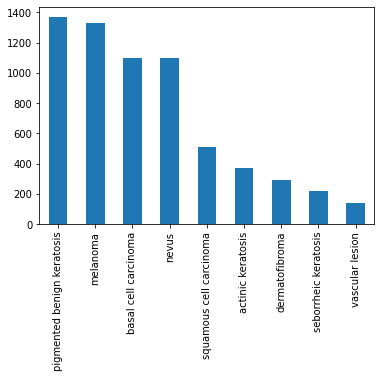

In [110]:
df_train_new['Label'].value_counts().plot.bar()

In [111]:
batch_size = 32
img_height = 180
img_width = 180

In [114]:
data_dir_train="/content/gdrive/MyDrive/UpGrad/Assignments/MelanomaDetection/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [115]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [116]:
model_2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [117]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [118]:
# View the summary of all layers
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

In [119]:
epochs = 25
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
169/169 [==============================] - 43s 238ms/step - loss: 2.3289 - accuracy: 0.1840 - val_loss: 2.0165 - val_accuracy: 0.2754
Epoch 2/25
169/169 [==============================] - 38s 220ms/step - loss: 1.8169 - accuracy: 0.3220 - val_loss: 2.7542 - val_accuracy: 0.2220
Epoch 3/25
169/169 [==============================] - 37s 215ms/step - loss: 1.6216 - accuracy: 0.4075 - val_loss: 2.3421 - val_accuracy: 0.2554
Epoch 4/25
169/169 [==============================] - 39s 224ms/step - loss: 1.5701 - accuracy: 0.4371 - val_loss: 1.7314 - val_accuracy: 0.3608
Epoch 5/25
169/169 [==============================] - 37s 214ms/step - loss: 1.4927 - accuracy: 0.4753 - val_loss: 1.4569 - val_accuracy: 0.4840
Epoch 6/25
169/169 [==============================] - 37s 215ms/step - loss: 1.4049 - accuracy: 0.5019 - val_loss: 1.4888 - val_accuracy: 0.4610
Epoch 7/25
169/169 [==============================] - 37s 214ms/step - loss: 1.3496 - accuracy: 0.5184 - val_loss: 1.5043 - val_ac

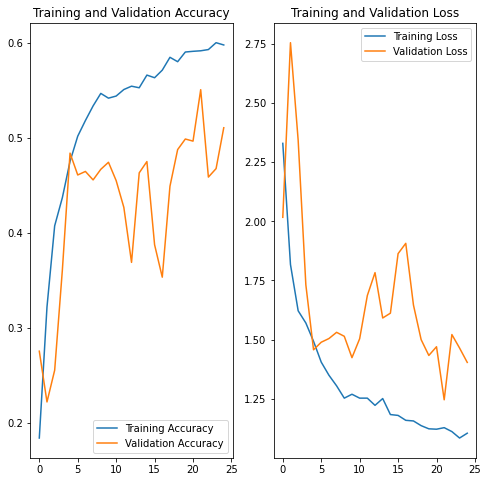

In [120]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [121]:
# Lets try without augumentation strategy
model_3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [122]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [123]:
# View the summary of all layers
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [124]:
epochs = 25
history = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
169/169 [==============================] - 35s 192ms/step - loss: 2.0156 - accuracy: 0.2481 - val_loss: 1.6905 - val_accuracy: 0.3653
Epoch 2/25
169/169 [==============================] - 35s 199ms/step - loss: 1.5794 - accuracy: 0.4358 - val_loss: 1.5388 - val_accuracy: 0.4707
Epoch 3/25
169/169 [==============================] - 34s 192ms/step - loss: 1.4015 - accuracy: 0.4978 - val_loss: 1.3841 - val_accuracy: 0.5071
Epoch 4/25
169/169 [==============================] - 35s 201ms/step - loss: 1.3105 - accuracy: 0.5364 - val_loss: 1.3699 - val_accuracy: 0.5108
Epoch 5/25
169/169 [==============================] - 34s 192ms/step - loss: 1.1942 - accuracy: 0.5710 - val_loss: 1.2081 - val_accuracy: 0.5568
Epoch 6/25
169/169 [==============================] - 34s 192ms/step - loss: 1.1056 - accuracy: 0.6053 - val_loss: 1.2006 - val_accuracy: 0.5561
Epoch 7/25
169/169 [==============================] - 34s 192ms/step - loss: 1.0307 - accuracy: 0.6285 - val_loss: 1.1497 - val_ac

The accuracy has significantly improved after removal of augumentation layer

##Test Model against Test dataaset

In [126]:
# Check test dataset
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
path_list_new = [x for x in glob(os.path.join(data_dir_test, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_test, '*', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
len(dataframe_dict_new)

118

In [127]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [128]:
# Load test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 118 files belonging to 9 classes.


In [132]:
# Evaluate test dataset
scores = model_3.evaluate(test_ds)

4/4 [==============================] - 45s 63ms/step - loss: 6.0003 - accuracy: 0.3729
